In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

In [2]:
#load data
!gdown --id 1Gp9Of2y6dGVji7CYXz-enxjkjpAeOVOY

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1Gp9Of2y6dGVji7CYXz-enxjkjpAeOVOY
To: /content/AirQuality[1].csv
100% 785k/785k [00:00<00:00, 35.6MB/s]


In [3]:
#read data
df = pd.read_csv('AirQuality[1].csv',sep=';')
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578",NaN,NaN
1,10/03/2004,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255",NaN,NaN
2,10/03/2004,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502",NaN,NaN
3,10/03/2004,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867",NaN,NaN
4,10/03/2004,22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888",NaN,NaN


In [4]:
df.shape

(9471, 17)

In [5]:
# getting the dtypes of the all columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   object 
 3   PT08.S1(CO)    9357 non-null   float64
 4   NMHC(GT)       9357 non-null   float64
 5   C6H6(GT)       9357 non-null   object 
 6   PT08.S2(NMHC)  9357 non-null   float64
 7   NOx(GT)        9357 non-null   float64
 8   PT08.S3(NOx)   9357 non-null   float64
 9   NO2(GT)        9357 non-null   float64
 10  PT08.S4(NO2)   9357 non-null   float64
 11  PT08.S5(O3)    9357 non-null   float64
 12  T              9357 non-null   object 
 13  RH             9357 non-null   object 
 14  AH             9357 non-null   object 
 15  Unnamed: 15    0 non-null      float64
 16  Unnamed: 16    0 non-null      float64
dtypes: float64(10), object(7)
memory usage: 1.2+ MB


In [6]:
#Dropping CO(GT) and Unnamed columns
df.drop(['CO(GT)','Unnamed: 15','Unnamed: 16'],axis = 1,inplace = True)

In [7]:
#Formatting some object columns from strings to floats

df.replace(to_replace=',',value='.',regex=True,inplace=True)

for i in 'C6H6(GT) T RH AH'.split():
   df[i] = pd.to_numeric(df[i],errors='coerce')

In [8]:
#Replacing null data from -200 to NaN for posterior treatment

df.replace(to_replace=-200,value=np.nan,inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   PT08.S1(CO)    8991 non-null   float64
 3   NMHC(GT)       914 non-null    float64
 4   C6H6(GT)       8991 non-null   float64
 5   PT08.S2(NMHC)  8991 non-null   float64
 6   NOx(GT)        7718 non-null   float64
 7   PT08.S3(NOx)   8991 non-null   float64
 8   NO2(GT)        7715 non-null   float64
 9   PT08.S4(NO2)   8991 non-null   float64
 10  PT08.S5(O3)    8991 non-null   float64
 11  T              8991 non-null   float64
 12  RH             8991 non-null   float64
 13  AH             8991 non-null   float64
dtypes: float64(12), object(2)
memory usage: 1.0+ MB


In [9]:
# check for missing values
df.isna().sum().sort_values(ascending=False)

NMHC(GT)         8557
NO2(GT)          1756
NOx(GT)          1753
PT08.S1(CO)       480
C6H6(GT)          480
PT08.S2(NMHC)     480
PT08.S3(NOx)      480
PT08.S4(NO2)      480
PT08.S5(O3)       480
T                 480
RH                480
AH                480
Date              114
Time              114
dtype: int64

In [10]:
# missing value handling
# Convert all applicable columns to numeric, handling errors
for col in df.columns:
    if df[col].dtype == 'object':  # Check if column is of object type
        try:
            df[col] = pd.to_numeric(df[col], errors='coerce')
        except ValueError:
            print(f"Could not convert column {col} to numeric")

# Fill missing values with the mean of each column (for numeric columns only)
df.fillna(df.mean(), inplace=True)

In [11]:
#Lets look at the discription also
df.describe(include="all").T

,count,mean,std,min,25%,50%,75%,max
Date,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Time,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PT08.S1(CO),9471.0,1099.833166,211.506999,647.0000,943.000000,1078.000000,1218.000000,2040.000
NMHC(GT),9471.0,218.811816,63.484629,7.0000,218.811816,218.811816,218.811816,1189.000
C6H6(GT),9471.0,10.083105,7.258562,0.1000,4.600000,8.700000,13.500000,63.700
PT08.S2(NMHC),9471.0,939.153376,259.981136,383.0000,744.000000,927.000000,1102.000000,2214.000
NOx(GT),9471.0,246.896735,192.258871,2.0000,113.000000,232.000000,281.500000,1479.000
PT08.S3(NOx),9471.0,835.493605,250.224117,322.0000,667.000000,821.000000,957.000000,2683.000
NO2(GT),9471.0,113.091251,43.655793,2.0000,86.000000,113.091251,132.000000,340.000
PT08.S4(NO2),9471.0,1456.264598,337.318719,551.0000,1246.000000,1456.264598,1658.000000,2775.000


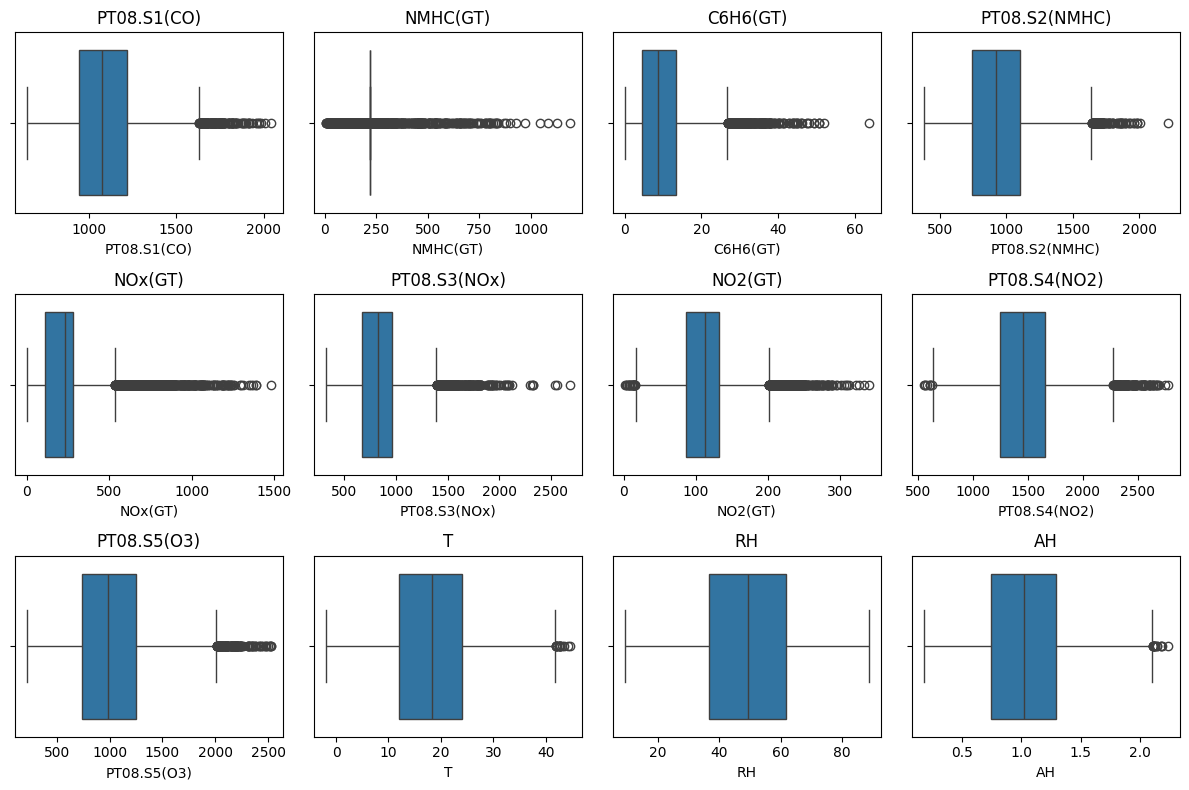

In [12]:
#Plot box plots for summary statistics of numerical columns & find outlier
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(12, 8))

# Filter for numerical columns and ensure they have variation
numerical_cols = [col for col in df.select_dtypes(include=['number']).columns if df[col].nunique() > 1]

for i, col in enumerate(numerical_cols):
    sns.boxplot(x=col, data=df, ax=axes[i // 4, i % 4])
    axes[i // 4, i % 4].set_title(col)

plt.tight_layout()
plt.show()

In [13]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
# finally calculating the interquartile range IQR
IQR = Q3 - Q1
# if the values fall behind Q1 - (1.5 * IQR) or above Q3 + 1.5*IQR,
#then it is been defined as outlier
((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()

Date               0
Time               0
PT08.S1(CO)      158
NMHC(GT)         914
C6H6(GT)         303
PT08.S2(NMHC)     96
NOx(GT)          803
PT08.S3(NOx)     290
NO2(GT)          399
PT08.S4(NO2)     142
PT08.S5(O3)      147
T                 16
RH                 0
AH                15
dtype: int64

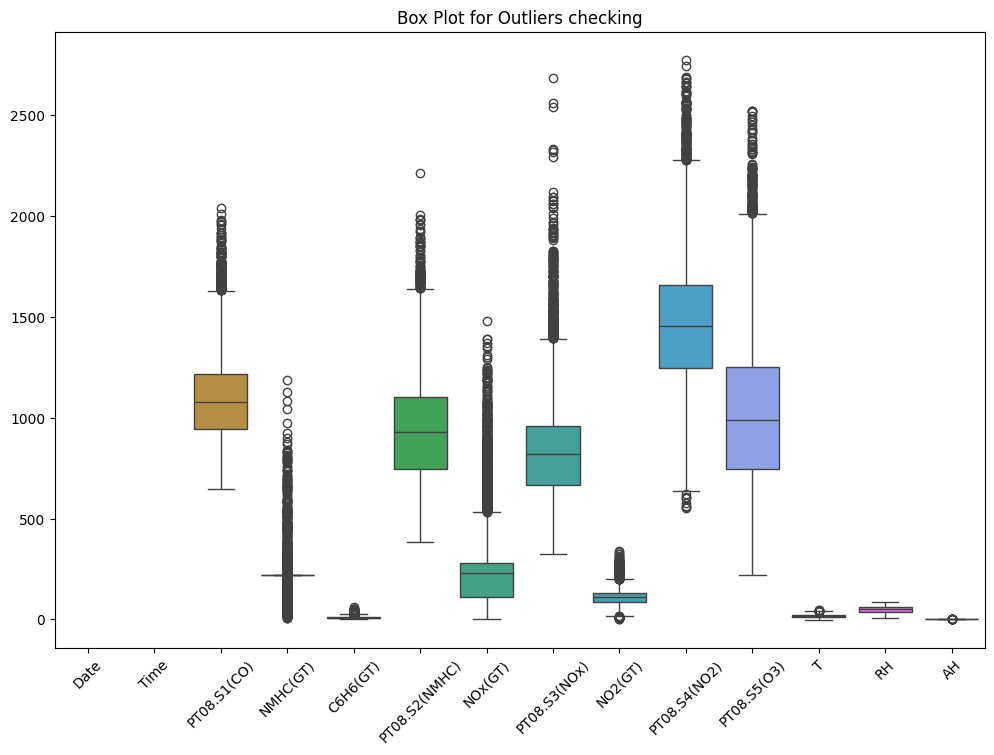

In [14]:
# Plot box plots for summary statistics of numerical columns
plt.figure(figsize=(12, 8))
sns.boxplot(data=df)
plt.title('Box Plot for Outliers checking')
plt.xticks(rotation=45)
plt.show()

In [15]:
# Assuming 'NMHC(GT)' was a typo and the actual column name is 'NMHC(GT)', proceed with the drop:
df.drop(columns=['NMHC(GT)', 'Date', 'Time'], inplace=True)
#there are many outlier and nnu in feature
# Verify the correct column names using:
print(df.columns)


Index(['PT08.S1(CO)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)',
       'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH', 'AH'],
      dtype='object')


In [16]:
df.dtypes

PT08.S1(CO)      float64
C6H6(GT)         float64
PT08.S2(NMHC)    float64
NOx(GT)          float64
PT08.S3(NOx)     float64
NO2(GT)          float64
PT08.S4(NO2)     float64
PT08.S5(O3)      float64
T                float64
RH               float64
AH               float64
dtype: object

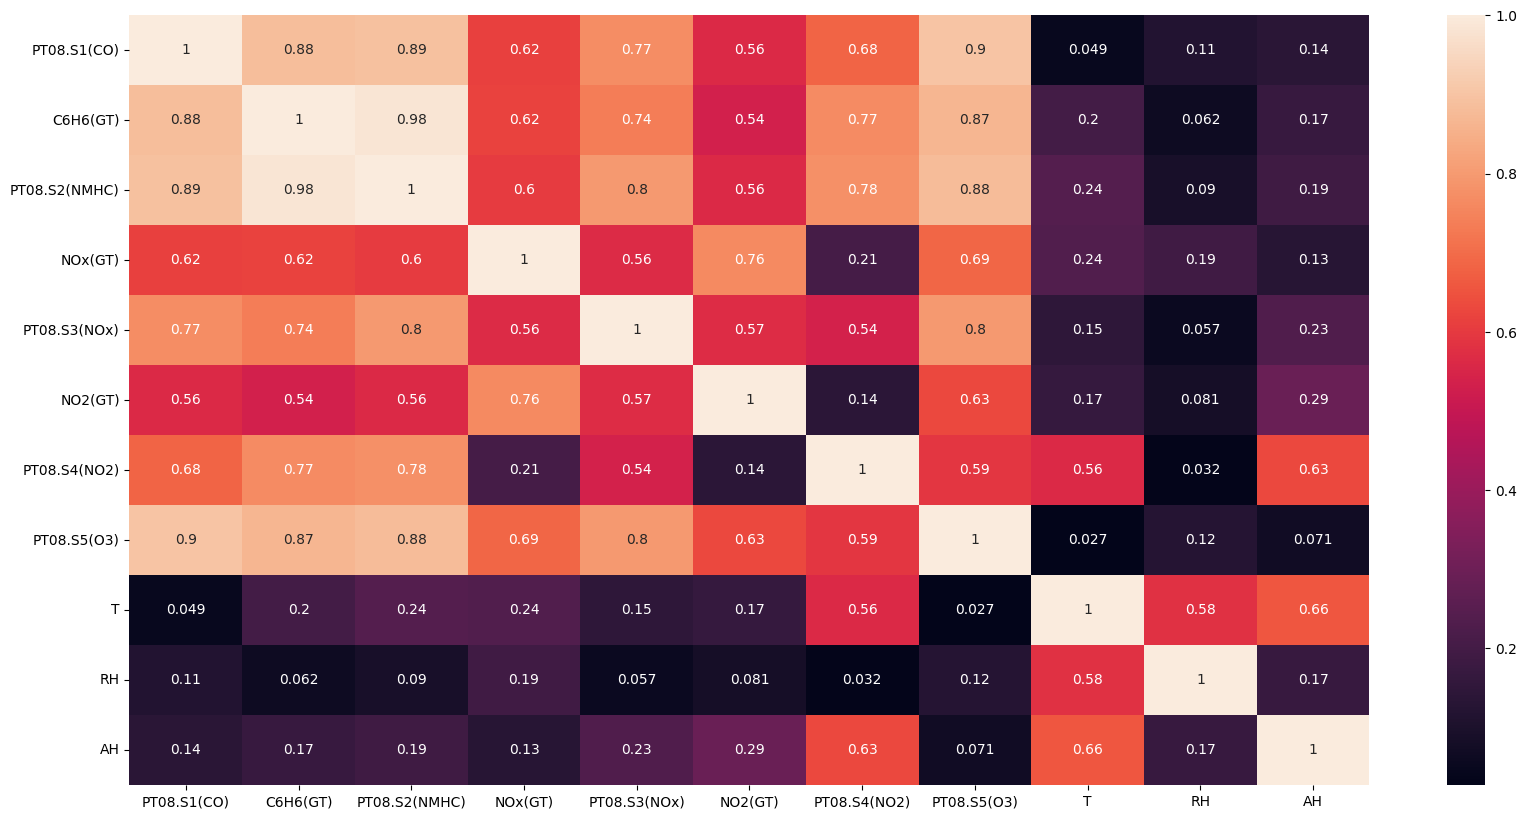

In [17]:
plt.figure(figsize=(20, 10))
sns.heatmap(df.corr().abs() ,  annot=True);

In [18]:
#train test split
X = df.drop('C6H6(GT)', axis=1)
y = df['C6H6(GT)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
#Standard Scaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

 1) PT08.S1(CO)                    1.173473
 2) PT08.S2(NMHC)                  0.028503
 3) NOx(GT)                        0.003880
 4) PT08.S3(NOx)                   0.003160
 5) NO2(GT)                        0.001730
 6) PT08.S4(NO2)                   0.000713
 7) PT08.S5(O3)                    -0.000332
 8) T                              -0.008972
 9) RH                             -0.026018
10) AH                             -0.097931


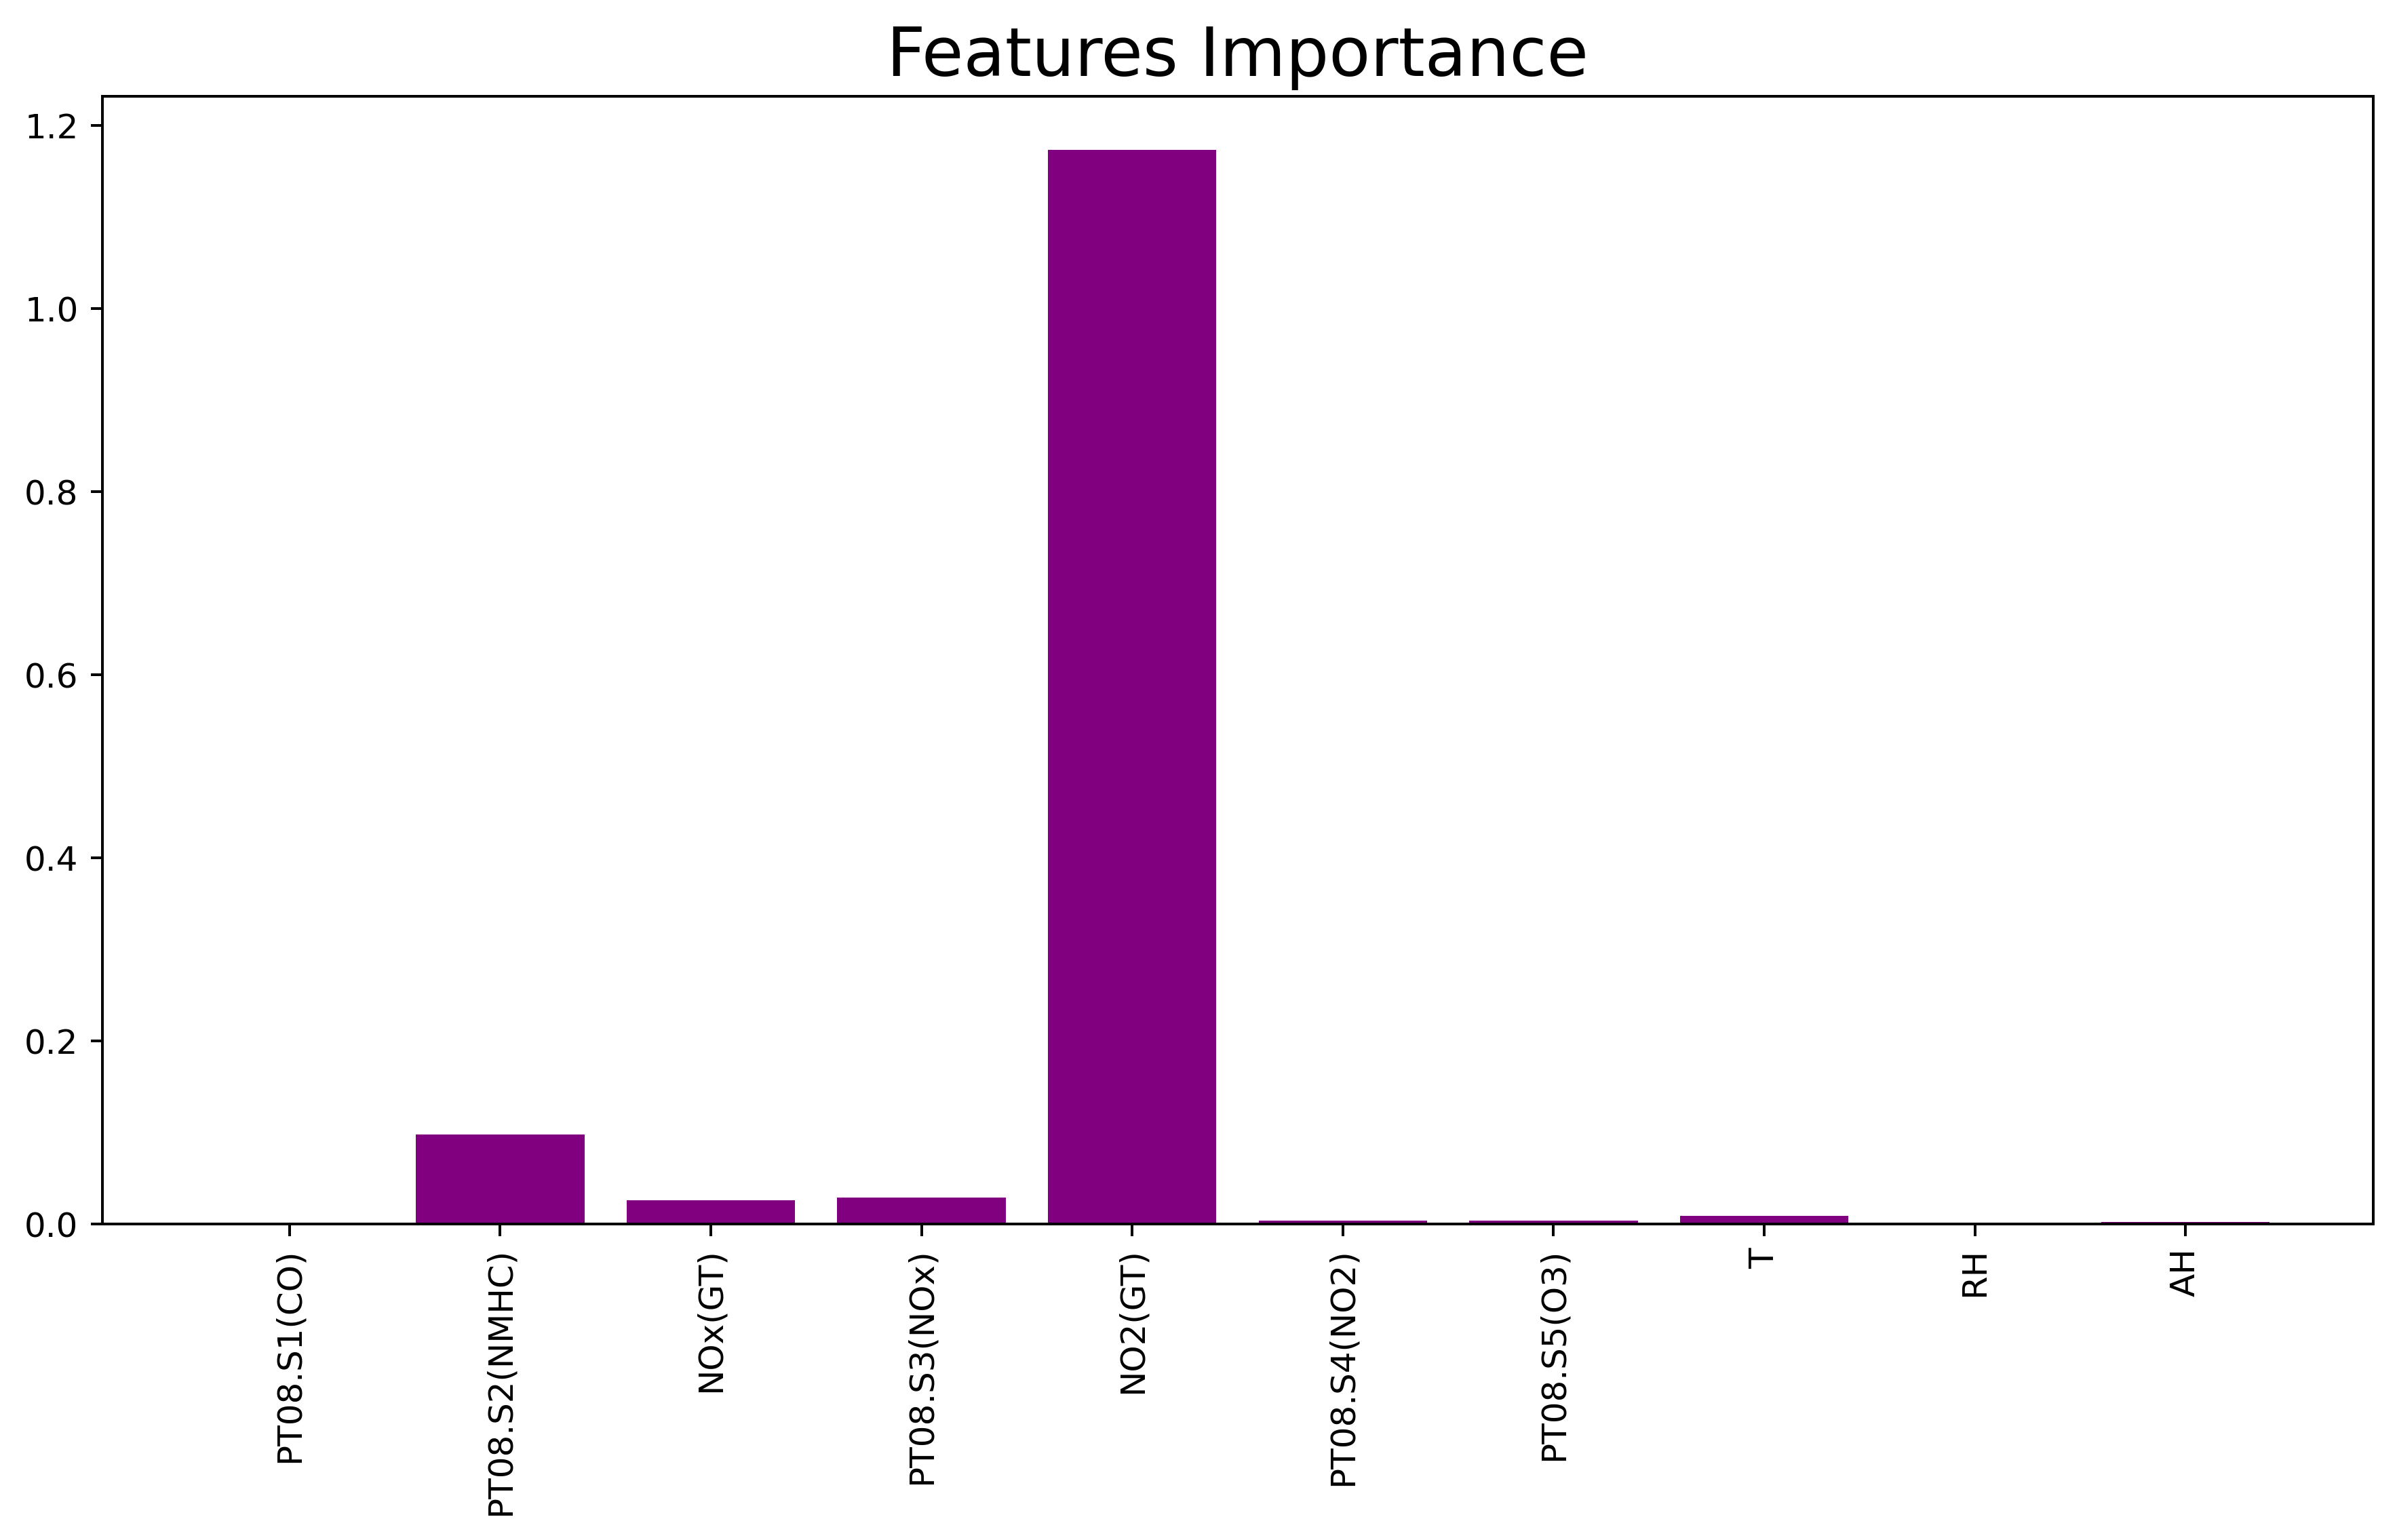

In [20]:
features_label = X_train.columns  # Use the columns from X_train instead

#create and fit the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# access features importance insights (coefficients)
importances = pd.Series(model.coef_, index=features_label)
indices = np.argsort(importances)[::-1]
for i in range(X_train.shape[1]):
  print("%2d) %-*s %f" %(i + 1, 30, features_label[i],importances[indices[i]]))

#sort the coefficients by absolute values to get the most influential features
importances = importances.abs().sort_values(ascending=False)

#Visualation of Features importance
plt.figure(figsize=(12, 6), dpi = 360)
plt.bar(range(X_train.shape[1]), importances[indices], color = 'purple', align= 'center')
plt.xticks(range(X_train.shape[1]), features_label, rotation = 90, fontsize = 10)
plt.title('Features Importance', fontsize = 20)
plt.show()

In [21]:
# Linear Regression
LR = LinearRegression()
LR.fit(X_train_scaled, y_train)
y_pred_LR = LR.predict(X_test_scaled)
r2_LR = r2_score(y_test, y_pred_LR)
print(f"R-squared for Linear Regression: {r2_LR:.4f}")
print(f"Mean Absolute Error for Linear Regression: {mean_absolute_error(y_test, y_pred_LR):.4f}")
print(f"Root Mean Squared Error for Linear Regression: {np.sqrt(mean_squared_error(y_test, y_pred_LR)):.4f}")

R-squared for Linear Regression: 0.9736
Mean Absolute Error for Linear Regression: 0.8187
Root Mean Squared Error for Linear Regression: 1.2080


In [22]:
# Ridge model
ridge_model = Ridge()
ridge_model.fit(X_train_scaled, y_train)
y_pred_ridge = ridge_model.predict(X_test_scaled)
r2_ridge = r2_score(y_test, y_pred_ridge)
print(f"R-squared for Ridge Regression: {r2_ridge:.4f}")

R-squared for Ridge Regression: 0.9736


In [23]:
# Lasso model
lasso_model = Lasso()
lasso_model.fit(X_train_scaled, y_train)
y_pred_lasso = lasso_model.predict(X_test_scaled)
r2_lasso = r2_score(y_test, y_pred_lasso)
print(f"R-squared for Lasso Regression: {r2_lasso:.4f}")

R-squared for Lasso Regression: 0.9405


In [24]:
#Random Forest
rf = RandomForestRegressor()
rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_test_scaled)
r2_rf = r2_score(y_test, y_pred_rf)
print(f"R-squared for Random Forest: {r2_rf:.4f}")

R-squared for Random Forest: 0.9981
